In [82]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [190]:


def pt_plot_2d(filename, var1, var2):
    title = 'Inverted plep VR : '
    if '_OS_' in filename: title += 'OS '
    if '_SS_' in filename: title += 'SS '
    if '_ee' in filename: title += 'ee '
    if '_eu' in filename: title += 'eu '
#     title = filename.split('/')[-1].split('.root')[0]
    if 'v6' in filename: title += 'v6p0 '
    if 'v8' in filename: title += 'v8p0 '
    title += ': el ' + var1.split("_")[2]
    # df = uproot.open('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root')['VSI_LeptonsMod_ntuples_DVtype'].pandas.df(entrystop=10000)
    ntuples = uproot.open(filename)['VSI_LeptonsMod_ntuples_DVtype']

    plt.figure(figsize=[10,10])
    plt.set_cmap(plt.cm.plasma)
    plt.rc('font', size=20) 

    if '_ee' in filename: 
        dv_mass_cut = ntuples[b'DV_mass'].array() > 5.5
        dv_quality_cut = ntuples[b'DV_2veryveryloose'].array() > 0,

    if '_eu' in filename:
        DV_mass = ntuples[b'DV_mass'].array()
        DV_r = ntuples[b'DV_r'].array()
        # '*' acts as '&&' and '+' acts as '||' for boolean numpy arrays
        dv_mass_cut = ((DV_mass > 2) * (DV_mass < 5.5)) * (DV_mass > -(7/150)*DV_r + 7) + (DV_mass > 5.5)
        dv_quality_cut = ntuples[b'DV_medium_veryveryloose'].array() > 0,


    pass_cuts = np.all((
        ntuples[b'DV_medium_veryveryloose'].array() ,
        ntuples[b'DV_pass_lep_pt'].array() > 0,
        ntuples[b'DV_pass_mat_veto'].array() > 0,
        ntuples[b'DV_cosmic_sep'].array() > 0.05,
        dv_mass_cut,
        ), axis = 0,
    )
    total = pass_cuts.sum()
    # print(total)

    pt_bins = np.linspace(0,100,25)
#     if var1.split("_")[2] == '1': 
#         pt_bins = np.linspace(0,25,25)
    h2d = plt.hist2d(ntuples[var1].array()[pass_cuts],
            ntuples[var2].array()[pass_cuts],
            bins=pt_bins,);
    plt.text(.1, .9, f'{total} events' , color='white', transform=plt.gca().transAxes)
    plt.ylabel("Calibrated Electron pT [GeV]")
    plt.xlabel("Electron GSF track pT [GeV]")
    plt.colorbar()
    plt.title(title)
    plt.savefig(f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/grl_update/plots/{title}.png', dpi=300);
    # plt.show()

    return h2d;



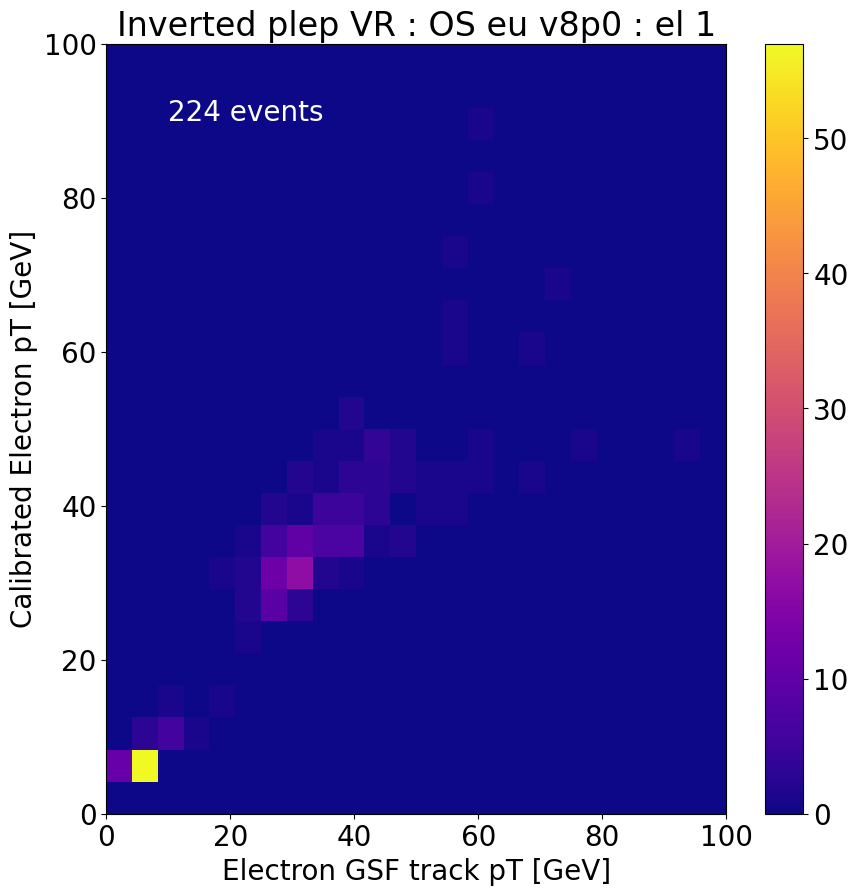

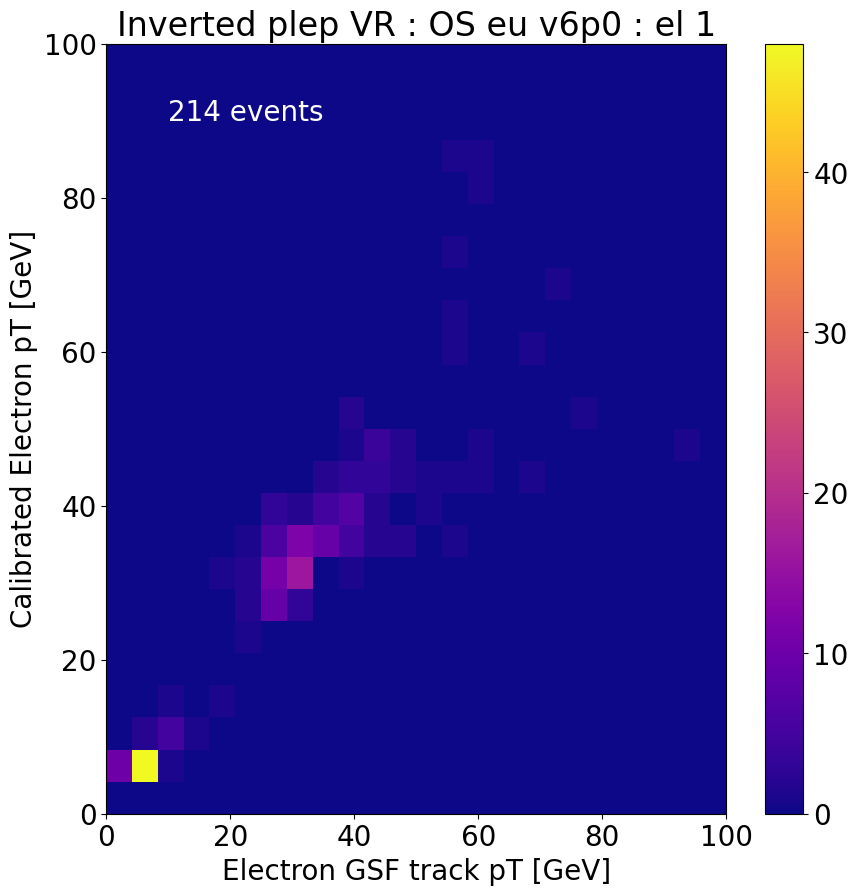

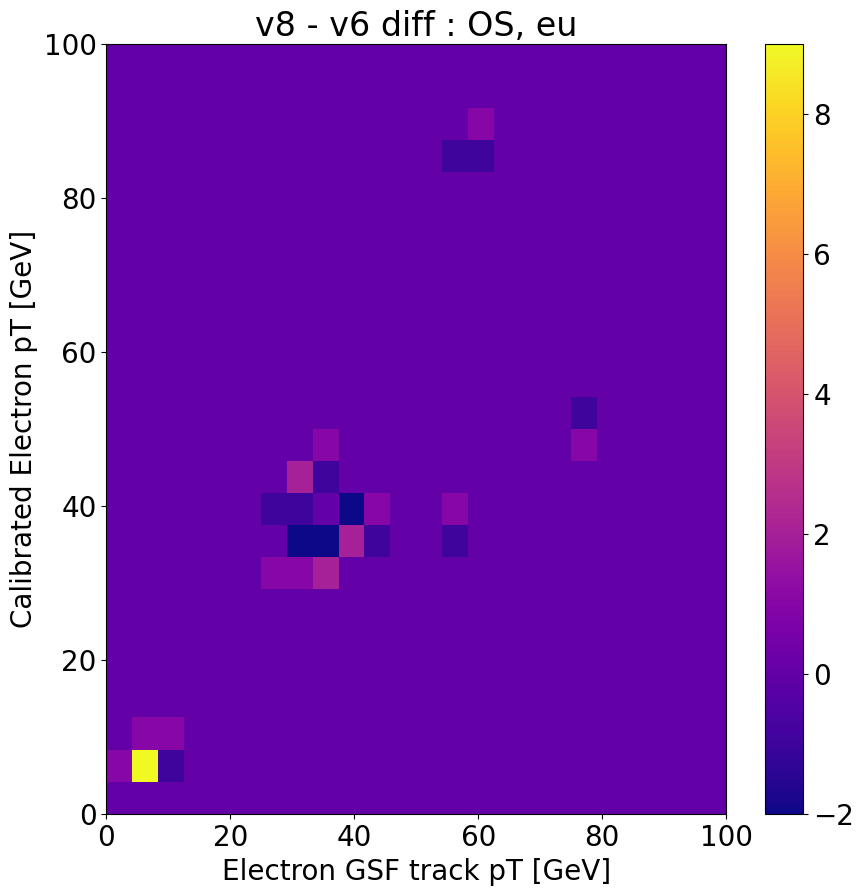

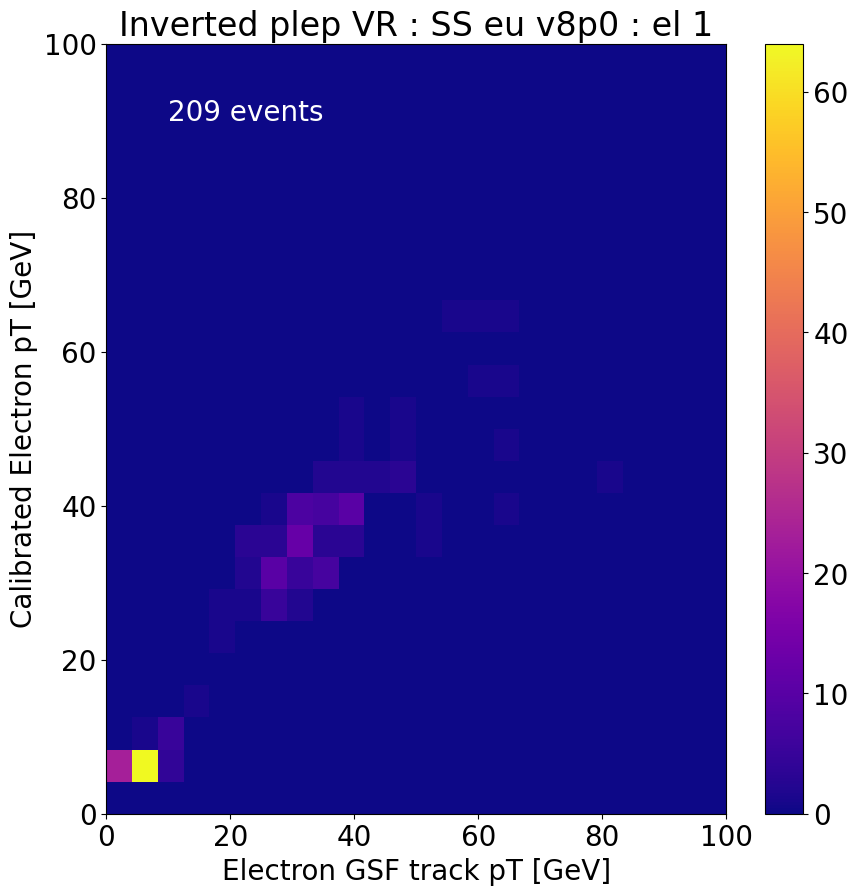

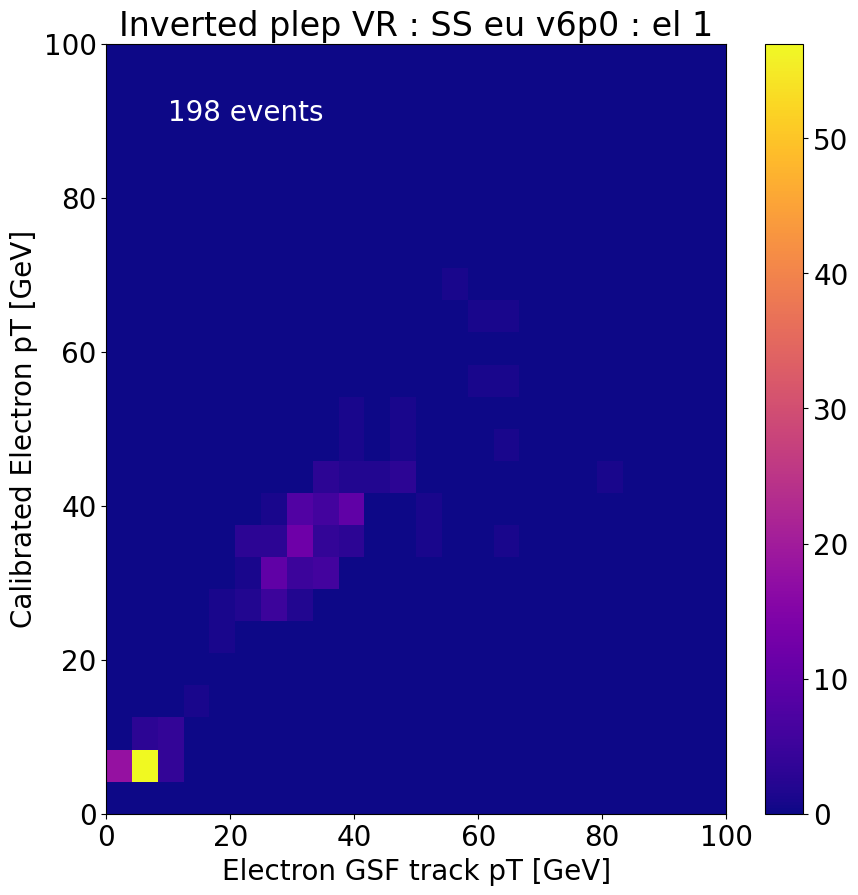

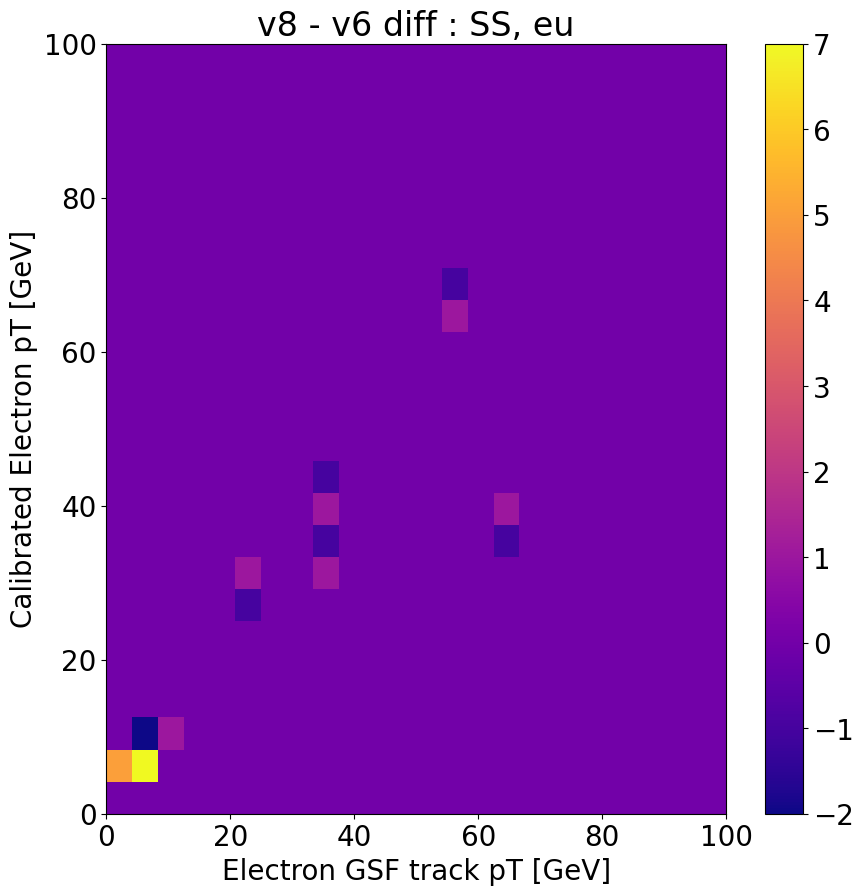

In [191]:
def h2d_diff(file1, file2, var1, var2, title):

    h2d_1 = pt_plot_2d(file1, var1, var2);
    h2d_2 = pt_plot_2d(file2, var1, var2);
    h2d_diff = h2d_1[0] - h2d_2[0]

    plt.figure(figsize=[10,10])
    plt.pcolormesh(h2d_1[1], h2d_1[2], h2d_diff.T)
    plt.ylabel("Calibrated Electron pT [GeV]")
    plt.xlabel("Electron GSF track pT [GeV]")
    plt.colorbar()
    plt.title(title)
    plt.savefig(f'plots/{title} {var1} {var2}.png', dpi=300)
    plt.show();

# h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_OS_ee.root',
#          '/data/newhouse/HNL/histograms/v6_fullrun2_VR_OS_ee.root',
#          'DV_el_0_std_trk_pt', 'DV_el_0_lepmatched_trk_pt',
#           'v8 - v6 diff : OS, ee');

# h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_OS_ee.root',
#          '/data/newhouse/HNL/histograms/v6_fullrun2_VR_OS_ee.root',
#          'DV_el_1_std_trk_pt', 'DV_el_1_lepmatched_trk_pt',
#           'v8 - v6 diff : OS, ee');

# h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_SS_ee.root',
#          '/data/newhouse/HNL/histograms/v6_fullrun2_VR_SS_ee.root',
#          'DV_el_0_std_trk_pt', 'DV_el_0_lepmatched_trk_pt',
#           'v8 - v6 diff : SS, ee');

# h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_SS_ee.root',
#          '/data/newhouse/HNL/histograms/v6_fullrun2_VR_SS_ee.root',
#          'DV_el_1_std_trk_pt', 'DV_el_1_lepmatched_trk_pt',
#           'v8 - v6 diff : SS, ee');


h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_OS_eu.root',
         '/data/newhouse/HNL/histograms/v6_fullrun2_VR_OS_eu.root',
         'DV_el_1_std_trk_pt', 'DV_el_1_lepmatched_trk_pt',
          'v8 - v6 diff : OS, eu');

h2d_diff('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/fullrun2_CR_histograms_data_SS_eu.root',
         '/data/newhouse/HNL/histograms/v6_fullrun2_VR_SS_eu.root',
         'DV_el_1_std_trk_pt', 'DV_el_1_lepmatched_trk_pt',
          'v8 - v6 diff : SS, eu');

In [26]:
h2d_1[1]

array([ 0.        ,  0.30612245,  0.6122449 ,  0.91836735,  1.2244898 ,
        1.53061224,  1.83673469,  2.14285714,  2.44897959,  2.75510204,
        3.06122449,  3.36734694,  3.67346939,  3.97959184,  4.28571429,
        4.59183673,  4.89795918,  5.20408163,  5.51020408,  5.81632653,
        6.12244898,  6.42857143,  6.73469388,  7.04081633,  7.34693878,
        7.65306122,  7.95918367,  8.26530612,  8.57142857,  8.87755102,
        9.18367347,  9.48979592,  9.79591837, 10.10204082, 10.40816327,
       10.71428571, 11.02040816, 11.32653061, 11.63265306, 11.93877551,
       12.24489796, 12.55102041, 12.85714286, 13.16326531, 13.46938776,
       13.7755102 , 14.08163265, 14.3877551 , 14.69387755, 15.        ])

In [5]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# df = uproot.open('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root')['VSI_LeptonsMod_ntuples_DVtype'].pandas.df(entrystop=10000)
ntuples = uproot.open('/data/newhouse/HNL/histograms/v6_fullrun2_VR_OS_ee.root')['VSI_LeptonsMod_ntuples_DVtype']



In [50]:
arr = ntuples.arrays()

188

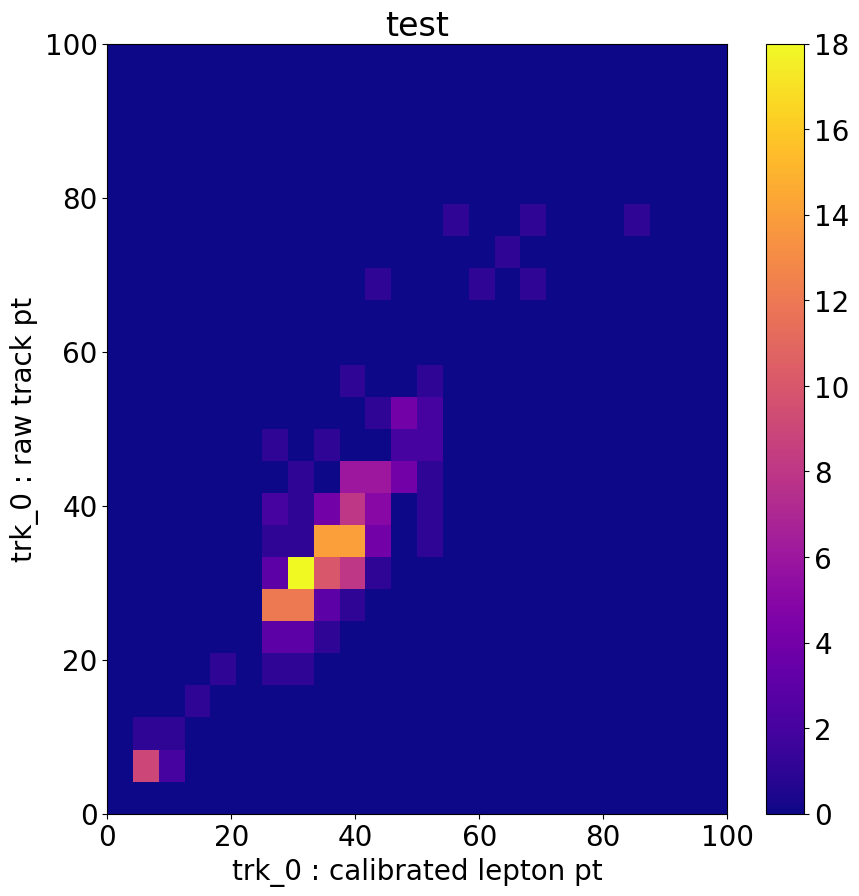

In [81]:
pass_cuts = np.all((
    arr[b'DV_2veryveryloose'] > 0,
    arr[b'DV_pass_lep_pt'] > 0,
    arr[b'DV_pass_mat_veto'] > 0,
    arr[b'DV_cosmic_sep'] > 0.05,
    arr[b'DV_mass'] > 5.5, # for ee channel
    ), axis = 0,
)
pass_cuts.sum()


# def pt_plot_2d(arr, var1, var2):
# title = filename.split('/')[-1].split('.root')[0]
# if 'v6' in filename: title += '_v6p0'
# if 'v8' in filename: title += '_v8p0'
# # df = uproot.open('/data/hnl/v8_histograms/jul23_inverted_plep_VR_v8p0_histograms/data151618_CR_histograms_data_OS_ee.root')['VSI_LeptonsMod_ntuples_DVtype'].pandas.df(entrystop=10000)
# ntuples = uproot.open(filename)['VSI_LeptonsMod_ntuples_DVtype']

plt.figure(figsize=[10,10])
plt.set_cmap(plt.cm.plasma)
plt.rc('font', size=20) 

var1 = b'DV_el_0_lepmatched_trk_pt'
var2 = b'DV_el_0_std_trk_pt'

pt_bins = np.linspace(0,100,25)
h2d = plt.hist2d(
    arr[var1][pass_cuts],
    arr[var2][pass_cuts],
    bins=pt_bins,);
# plt.colorbar()
plt.xlabel('trk_0 : calibrated lepton pt')
plt.ylabel('trk_0 : raw track pt')
plt.colorbar()
plt.title('test')
#     plt.savefig(f'plots/{title}_{var1}_{var2}.png', dpi=300);
plt.show()

#     return h2d;

<Figure size 1000x1000 with 0 Axes>

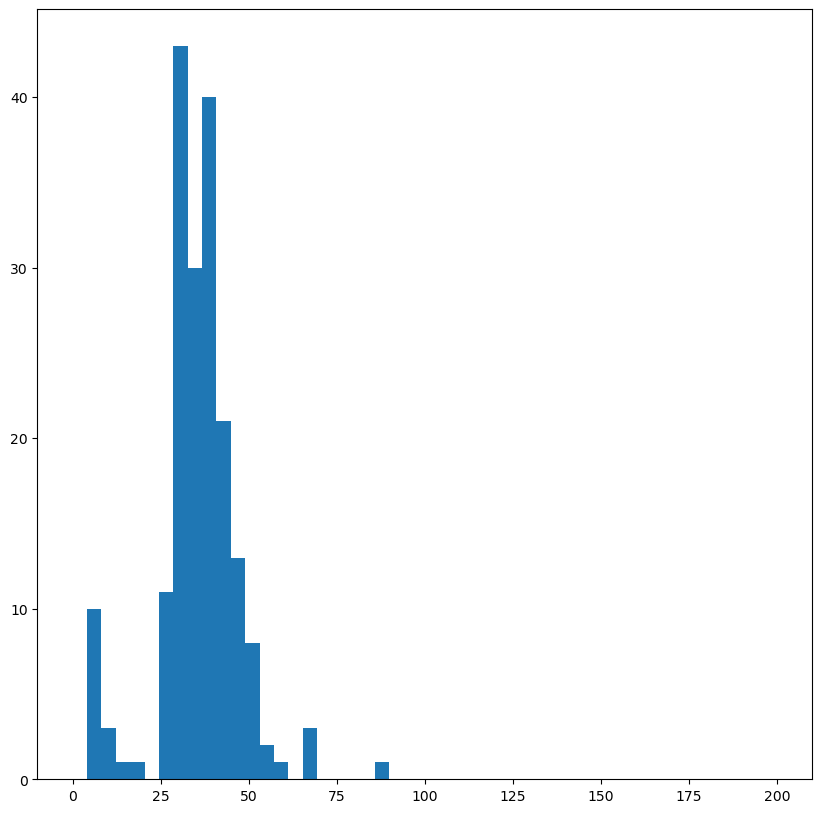

In [54]:
plt.figure(figsize=[10,10])
plt.hist(arr[b'DV_el_0_lepmatched_trk_pt'][pass_cuts], bins=np.linspace(0,200,50))
plt.show()

In [119]:
"*(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150)*DV_r + 7 ) || DV_mass > 5.5)" # diagonal cut

{b'weight_pileup': array([1., 1., 1., ..., 1., 1., 1.]),
 b'weight_pileup_1UP': array([1., 1., 1., ..., 1., 1., 1.]),
 b'weight_pileup_1DOWN': array([1., 1., 1., ..., 1., 1., 1.]),
 b'DV_weight_LNC_only': array([1., 1., 1., ..., 1., 1., 1.]),
 b'DV_weight_LNC_plus_LNV': array([1., 1., 1., ..., 1., 1., 1.]),
 b'event_is_LNC': array([0., 0., 0., ..., 0., 0., 0.]),
 b'event_is_LNV': array([0., 0., 0., ..., 0., 0., 0.]),
 b'DV_trk_deta': array([0.06161726, 0.0023402 , 0.0825938 , ..., 0.09987473, 0.00417042,
        0.02899289]),
 b'DV_trk_dphi': array([0.05169092, 0.00640684, 0.11374474, ..., 0.23871744, 0.03509557,
        0.04221165]),
 b'DV_trk_dpt': array([ 1.02492571,  9.23427391,  4.04284191, ...,  3.29897046,
         2.96079445, 73.32855988]),
 b'DV_trk_dR': array([0.08042784, 0.00682086, 0.14056885, ..., 0.25876819, 0.03534249,
        0.05120948]),
 b'DV_cosmic_sep': array([3.9814663 , 3.72727691, 3.22728397, ..., 5.73256823, 5.15063591,
        5.5245318 ]),
 b'DV_trk_max_chi2_

In [135]:

diag_cut.sum()

179400

In [132]:
"*(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150)*DV_r + 7 ) || DV_mass > 5.5)" # diagonal cut

array([-0.22911824, -5.93187729, -0.51726115, ..., -1.50746913,
       -1.58487081, -1.3571498 ])

In [69]:
import uproot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

for filename in glob.glob('/data/hnl/histograms/v8p3_histograms/histograms_fullrun2_*.root'):
    f = uproot.open(filename)
    df = f['VSI_LeptonsMod_ntuples_LNC_DVtype'].pandas.df(['*pileup*', '*weight*'])
    print(np.isnan(df['pileup_1UP']).sum())


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [58]:
df['DV_weight_LNC_only__syst_pileup_up'] = df['DV_weight_LNC_only']*df['pileup_1UP']
df['DV_weight_LNC_only__syst_pileup_down'] = df['DV_weight_LNC_only']*df['pileup_1DOWN']

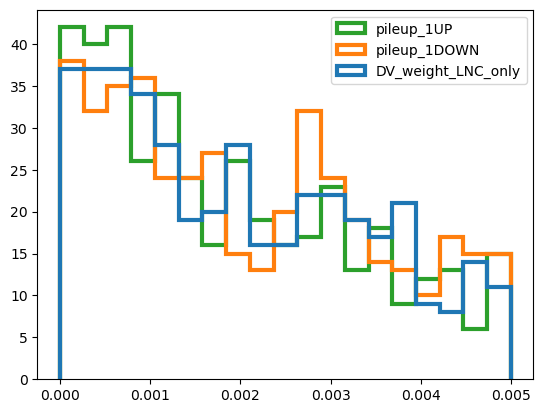

In [59]:
plt.hist(df[['DV_weight_LNC_only', 'DV_weight_LNC_only__syst_pileup_up', 'DV_weight_LNC_only__syst_pileup_down']], 
         bins=np.linspace(0,.005,20), histtype='step', linewidth=3)
plt.legend(df.columns)
plt.show()

In [60]:
df[df.DV_weight_LNC_only == 0]

,pileup_1UP,pileup_1DOWN,DV_weight_LNC_only,DV_weight_LNC_plus_LNV,DV_weight_LNC_only__syst_pileup_up,DV_weight_LNC_only__syst_pileup_down
entry,,,,,,
357,1.0,1.0,0.0,0.0,0.0,0.0
